#STEP 1 and 2: Setup & Get the Data#

In [1]:
import sys
import sklearn
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#importing the necessary modules
import pandas as pd
from zipfile import ZipFile
from urllib.request import urlopen
import io

#loading the dataset
file_path = 'https://raw.githubusercontent.com/aiforsec/RIT-DSCI-633-FDS/main/Assignments/titanic.zip'
f = urlopen(file_path).read()
zip_file = ZipFile(io.BytesIO(f))

#Reading the test and train dataframes
test_df = pd.read_csv(zip_file.open('test.csv'))
train_df = pd.read_csv(zip_file.open('train.csv'))

#Print the first 5 rows of the dataframe
print(train_df.head())
print()
print(test_df.head())
print()

#Print the number of rows and columns of dataframe
print("Shape of train dataframe: " , train_df.shape)
print()
print("Shape of test dataframe: " , test_df.shape)

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]

Shape of train dataframe:  (891, 12)

Shape of test dataframe:  (418, 11)


#STEP 3: Data Manipulation and Analysis using Pandas framework#

In [3]:
#Print the summary of the DataFrame
print(train_df.info())
print()
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

In [4]:
#Print the individual description for both the columns of the dataframe
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


##As you can see above, there are 177 NULL values in the Age column, 687 in the Cabin colum and 2 values in the Embarked. 

In [5]:
print(train_df.columns.values, test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked'] ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [6]:
print(train_df.describe())
print(test_df.describe())

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.3923

In [7]:
#total = train_df.shape[0] + test_df.shape[0]
#print(train_df.shape[0]/ total)
#print(test_df.shape[0]/ total)

print(train_df.Pclass.value_counts())

print()

print(train_df.groupby("Pclass").Survived.value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


#STEP 4: DATA VISUALISATION

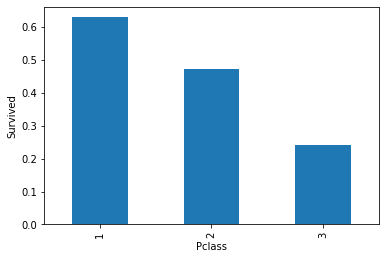

In [8]:
train_df.groupby('Pclass').Survived.mean().plot(kind='bar')
plt.ylabel('Survived')
plt.xlabel('Pclass')
plt.show()

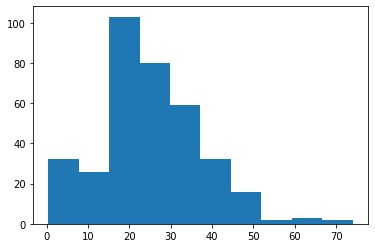

In [9]:
train_df_3rd_class = train_df[train_df['Pclass'] == 3]
plt.hist(train_df_3rd_class['Age'])
plt.show()

In [10]:
train_test_df = [train_df, test_df]

# STEP 5: Prepare the data for Machine Learning Model

In [11]:
for dataset in train_test_df:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [12]:
for tr in train_test_df:
  tr['Embarked'] = tr['Embarked'].fillna('S') #filling missing embarked value with 'S'
  tr['Embarked'] = tr['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [13]:
for tr in train_test_df:
  age_avg = tr['Age'].mean()
  age_std = tr['Age'].std()
  age_null = tr['Age'].isnull().sum()
  age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null)
  tr['Age'][np.isnan(tr['Age'])] = age_null_random_list
  tr['Age'] = tr['Age'].astype(int)
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
for dataset in train_test_df:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
for dataset in train_test_df:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4) 
for dataset in train_test_df:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [15]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
train_df = train_df.drop(features_drop, axis=1)
print(train_df.head())
test_df = test_df.drop(features_drop, axis=1)
train_df = train_df.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

   PassengerId  Survived  Pclass  ...  Embarked       AgeBand         FareBand
0            1         0       3  ...         0  (16.0, 32.0]   (-0.001, 7.91]
1            2         1       1  ...         1  (32.0, 48.0]  (31.0, 512.329]
2            3         1       3  ...         0  (16.0, 32.0]   (7.91, 14.454]
3            4         1       1  ...         0  (32.0, 48.0]  (31.0, 512.329]
4            5         0       3  ...         0  (32.0, 48.0]   (7.91, 14.454]

[5 rows x 9 columns]


#STEP 6 & 7: Select and Train a Model and Evaluating Accuracy


In [16]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 5), (891,), (418, 5))

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + '%')

79.24%
